## Fake News Detection using LSTM

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Fake_News_Data.csv")

In [3]:
df.head()

,News,Target
0,After the American Rescue Plan’s food and nutr...,0
1,“Conventional generators are very thin right n...,0
2,"Says Chelsea Clinton tweeted, ""If Jesus were a...",0
3,“First time in 70 years the National Day Of Pr...,0
4,Says he was “one of the 2 (state Senators) who...,1


In [4]:
df.Target.value_counts()

0    13367
1     1633
Name: Target, dtype: int64

In [5]:
X = df['News']

In [6]:
y = df['Target']

In [7]:
X.shape

(15000,)

In [8]:
y.shape

(15000,)

In [9]:
import tensorflow as tf

In [10]:
tf.__version__

'2.3.0'

In [11]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [12]:
voc_size = 10000

In [13]:
messages = X.copy()

In [14]:
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sujit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Word Cloud Representation

In [15]:
from wordcloud import WordCloud, STOPWORDS
stop_words = stopwords.words('english')
stop_words.extend(['say','says'])

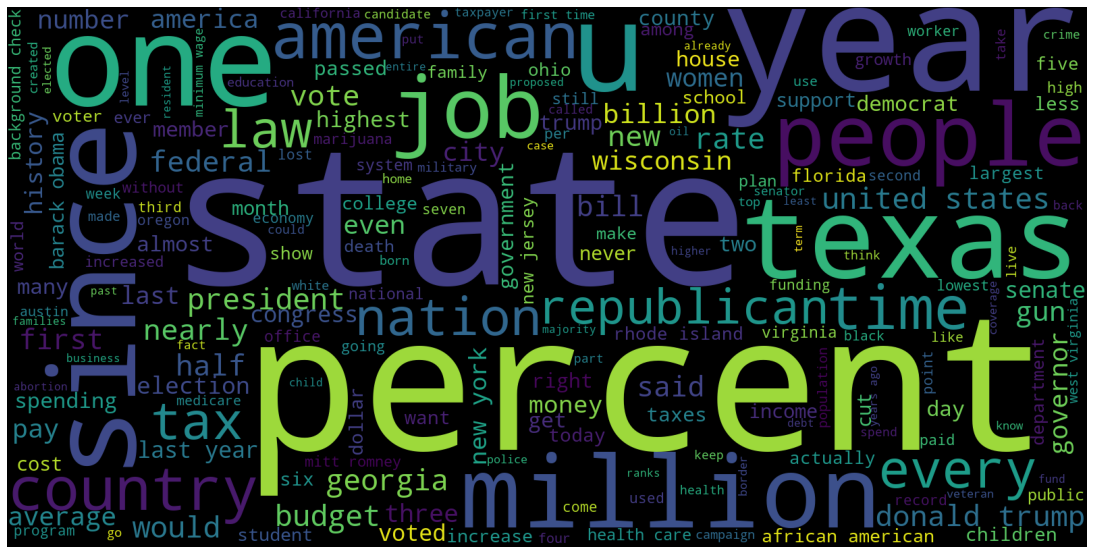

In [16]:
true_words = ''
true_messages = df[df.Target==1].News
for sentence in true_messages:
    tokens = sentence.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    true_words += " ".join(tokens)

wordcloud = WordCloud(width = 1600, height = 800,
                background_color ='black',
                stopwords = stop_words,
                min_font_size = 10).generate(true_words)

plt.figure(figsize = (15, 15), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

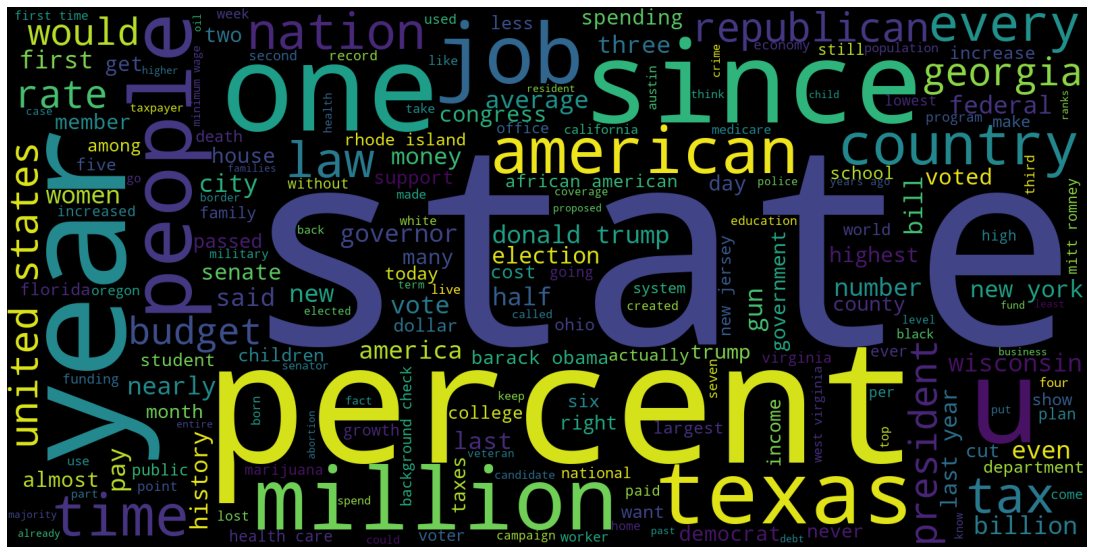

In [17]:
false_words = ''
false_messages = df[df.Target==1].News
for sentence in false_messages:
    tokens = sentence.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    false_words += " ".join(tokens)

wordcloud = WordCloud(width = 1600, height = 800,
                background_color ='black',
                stopwords = stop_words,
                min_font_size = 10).generate(false_words)

plt.figure(figsize = (15, 15), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

### Stemming

In [18]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(len(messages)):
  review = re.sub('[^a-zA-Z]', ' ', messages[i])
  review = review.lower()
  review = review.split()
  
  review = [ps.stem(word) for word in review if not word in stop_words]
  review = ' '.join(review)
  corpus.append(review)

In [19]:
corpus

['american rescu plan food nutrit assist hunger alreadi sharpli unit state',
 'convent gener thin right texa gone mani renew',
 'chelsea clinton tweet jesu aliv today work plan parenthood',
 'first time year nation day prayer observ nation capit',
 'one state senat vote north carolina bodi camera law',
 'global cost corrupt much world gdp',
 'goal preserv earth land water million peopl stand lose land livelihood tribal indigen peopl',
 'string attach money get incent expand medicaid',
 'ongo audit presidenti elect arizona show trump ahead vote nearli ballot declar illeg nearli biden',
 'charg drop bill cosbi grant earli releas',
 'late decemb last month total peopl appar die get covid vaccin unit state actual number almost certainli higher',
 'nikki haley white wash name thought would give better chanc name nimrata randhawa',
 'year old boy pass away heart attack two day pfizer covid experiment jab',
 'joe biden propos famili tri pass busi farm son daughter grandson granddaught go pay 

### One Hot Representation

In [20]:
onehot_repr = [one_hot(words, voc_size) for words in corpus]
onehot_repr

[[854, 3914, 5738, 366, 4854, 9718, 6553, 9610, 3174, 6775, 425],
 [1097, 8156, 3968, 1629, 374, 9373, 7087, 4139],
 [1869, 7578, 3257, 5418, 7186, 1364, 7309, 5738, 6874],
 [2633, 3442, 1660, 1218, 5959, 8028, 4116, 1218, 9251],
 [8538, 425, 3050, 3409, 4906, 5924, 6728, 53, 1285],
 [4750, 4043, 1454, 8319, 8966, 4107],
 [338,
  4167,
  2879,
  678,
  5061,
  5771,
  8451,
  2600,
  2138,
  678,
  9680,
  4799,
  6859,
  8451],
 [4658, 8259, 4116, 6752, 7814, 5244, 789],
 [6480,
  6675,
  5273,
  4686,
  9292,
  3574,
  6415,
  5426,
  3409,
  3553,
  1540,
  6405,
  1042,
  3553,
  6313],
 [5504, 8723, 9896, 3813, 4298, 7847, 6851],
 [6909,
  2983,
  450,
  2750,
  4472,
  8451,
  1123,
  212,
  6752,
  271,
  2539,
  6775,
  425,
  2348,
  3469,
  7622,
  9754,
  42],
 [5705, 1330, 7828, 4077, 2447, 2035, 1532, 498, 2327, 9052, 2447, 1243, 1744],
 [1660, 8041, 2981, 2451, 413, 2196, 6376, 1274, 5959, 8282, 271, 6902, 8637],
 [7124,
  6313,
  8175,
  436,
  2722,
  2451,
  7251,
  75

### Embedding Representation

In [21]:
sent_len = 20
embedded_docs = pad_sequences(onehot_repr, padding='pre', maxlen=sent_len)
print(embedded_docs)

[[   0    0    0 ... 3174 6775  425]
 [   0    0    0 ... 9373 7087 4139]
 [   0    0    0 ... 7309 5738 6874]
 ...
 [   0    0    0 ... 7431 2085 3050]
 [   0    0    0 ... 9113 3469 1274]
 [   0    0    0 ... 3809 6284 3182]]


In [22]:
len(embedded_docs)

15000

In [23]:
embedding_vector_features = 40
model = Sequential()
model.add(Embedding(voc_size, embedding_vector_features, input_length=sent_len))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 40)            400000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               56400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 456,501
Trainable params: 456,501
Non-trainable params: 0
_________________________________________________________________
None


In [24]:
import numpy as np
X_final = np.array(embedded_docs)
y_final = np.array(y)

In [25]:
X_final.shape, y_final.shape

((15000, 20), (15000,))

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

### Model Training

In [27]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
158/158 [==============================] - 4s 25ms/step - loss: 0.3675 - accuracy: 0.8876 - val_loss: 0.3316 - val_accuracy: 0.8927
Epoch 2/10
158/158 [==============================] - 4s 24ms/step - loss: 0.3015 - accuracy: 0.8902 - val_loss: 0.3389 - val_accuracy: 0.8923
Epoch 3/10
158/158 [==============================] - 4s 26ms/step - loss: 0.2478 - accuracy: 0.8971 - val_loss: 0.3728 - val_accuracy: 0.8794
Epoch 4/10
158/158 [==============================] - 4s 25ms/step - loss: 0.1996 - accuracy: 0.9170 - val_loss: 0.5151 - val_accuracy: 0.8853
Epoch 5/10
158/158 [==============================] - 4s 23ms/step - loss: 0.1595 - accuracy: 0.9337 - val_loss: 0.5202 - val_accuracy: 0.8481
Epoch 6/10
158/158 [==============================] - 4s 26ms/step - loss: 0.1248 - accuracy: 0.9475 - val_loss: 0.5860 - val_accuracy: 0.8525
Epoch 7/10
158/158 [==============================] - 4s 24ms/step - loss: 0.0981 - accuracy: 0.9601 - val_loss: 0.6721 - val_accuracy: 0.8517

### Performance Metrics and Accuracy

In [28]:
y_pred=model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [29]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
def generate_report(y_test, y_pred):
    print(confusion_matrix(y_test, y_pred))
    print(accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [30]:
generate_report(y_test, y_pred)

[[4064  355]
 [ 450   81]]
0.8373737373737373
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      4419
           1       0.19      0.15      0.17       531

    accuracy                           0.84      4950
   macro avg       0.54      0.54      0.54      4950
weighted avg       0.82      0.84      0.83      4950



### Adding Dropout

In [31]:
from tensorflow.keras.layers import Dropout
## Creating model
def build_model():
    embedding_vector_features=40
    model = Sequential()
    model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_len))
    model.add(Dropout(0.3))
    model.add(LSTM(100))
    model.add(Dropout(0.3))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [32]:
build_model()
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
158/158 [==============================] - 4s 23ms/step - loss: 0.0466 - accuracy: 0.9832 - val_loss: 0.9077 - val_accuracy: 0.8311
Epoch 2/10
158/158 [==============================] - 4s 23ms/step - loss: 0.0354 - accuracy: 0.9891 - val_loss: 1.1987 - val_accuracy: 0.8026
Epoch 3/10
158/158 [==============================] - 3s 22ms/step - loss: 0.0294 - accuracy: 0.9909 - val_loss: 1.2140 - val_accuracy: 0.8285
Epoch 4/10
158/158 [==============================] - 4s 25ms/step - loss: 0.0227 - accuracy: 0.9931 - val_loss: 1.1853 - val_accuracy: 0.8372
Epoch 5/10
158/158 [==============================] - 4s 24ms/step - loss: 0.0202 - accuracy: 0.9926 - val_loss: 1.2548 - val_accuracy: 0.8307
Epoch 6/10
158/158 [==============================] - 4s 24ms/step - loss: 0.0156 - accuracy: 0.9953 - val_loss: 1.4597 - val_accuracy: 0.8170
Epoch 7/10
158/158 [==============================] - 4s 24ms/step - loss: 0.0211 - accuracy: 0.9925 - val_loss: 1.4011 - val_accuracy: 0.8287

### Performance Metrics and Accuracy

In [33]:
y_pred=model.predict_classes(X_test)

In [34]:
generate_report(y_test, y_pred)

[[3936  483]
 [ 424  107]]
0.8167676767676768
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      4419
           1       0.18      0.20      0.19       531

    accuracy                           0.82      4950
   macro avg       0.54      0.55      0.54      4950
weighted avg       0.83      0.82      0.82      4950



### Data Balancing using Random Over Sampling

In [35]:
from imblearn.over_sampling import RandomOverSampler

In [36]:
oversample = RandomOverSampler()
X_train, y_train = oversample.fit_resample(X_train,y_train)

In [ ]:
build_model()
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
280/280 [==============================] - 6s 23ms/step - loss: 0.0060 - accuracy: 0.9987 - val_loss: 1.9367 - val_accuracy: 0.8147
Epoch 2/10
280/280 [==============================] - 6s 22ms/step - loss: 0.0143 - accuracy: 0.9958 - val_loss: 1.4923 - val_accuracy: 0.8014
Epoch 3/10
280/280 [==============================] - 6s 21ms/step - loss: 0.0109 - accuracy: 0.9969 - val_loss: 1.8484 - val_accuracy: 0.8246
Epoch 4/10
280/280 [==============================] - 7s 24ms/step - loss: 0.0023 - accuracy: 0.9996 - val_loss: 2.0326 - val_accuracy: 0.8331
Epoch 5/10
 26/280 [=>............................] - ETA: 4s - loss: 0.0011 - accuracy: 1.0000

### Performance Metrics and Accuracy

In [ ]:
y_pred=model.predict_classes(X_test)

In [ ]:
generate_report(y_test, y_pred)

### Data Balancing using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X_final, y_final)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42, stratify=y_sm)

In [ ]:
build_model()
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=8, batch_size=64)

### Performance Metrics and Accuracy

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
history.history.keys()

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_pred=model.predict_classes(X_test)

In [ ]:
generate_report(y_test, y_pred)

### Saving the Model

In [ ]:
# model.save("model.h5", overwrite=True)
# print("Saved model to disk")

### Testing the model with User Input

In [ ]:
def fake_news_detect(news_headline):
    news = news_headline
    corpus = []
    review = re.sub('[^a-zA-Z]', ' ', news)
    review = review.lower()
    review = review.split()
    print(review)

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
    print(corpus)

    onehot_repr = [one_hot(words, voc_size) for words in corpus]
    print(onehot_repr)
    embedded_docs = pad_sequences(onehot_repr, padding='pre', maxlen=sent_len)
    print(embedded_docs)
    prediction = model.predict(embedded_docs)
    print(prediction)

    if prediction > 0.1:
        output = "Real"
    else:
        output = "Fake"
    print(output)

In [ ]:
fake_news_detect('“Anyone remember Kamala telling Joe during the debate: ‘You will do whatever the Chinese tell you! They gave your son over a billion dollars.’”')